# Numerical results

### Load packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import loadmat

# 1D Dam-break problem

In [27]:
# Load the .mat file
mat_data = loadmat('data/dambreakdata.mat')

h_sol = mat_data['h']
u_sol = mat_data['u']

h_sol = np.array(h_sol[0, :])
u_sol = np.array(u_sol[0, :])

# Load the numerical solution
mat_data = loadmat('data/1D-dam-break-verification.mat')

q = mat_data['q'] 
x = mat_data['x']

h_num = q[0, :]
hu_num = q[1, :]

N = 200 # Number of grid points
L = 50 # Length of the domain
x = np.linspace(0, L, N)

# Initial conditions
g = 9.81

hl = 3.5
hr = 1.25
h = np.where(x < 20, hl, hr)


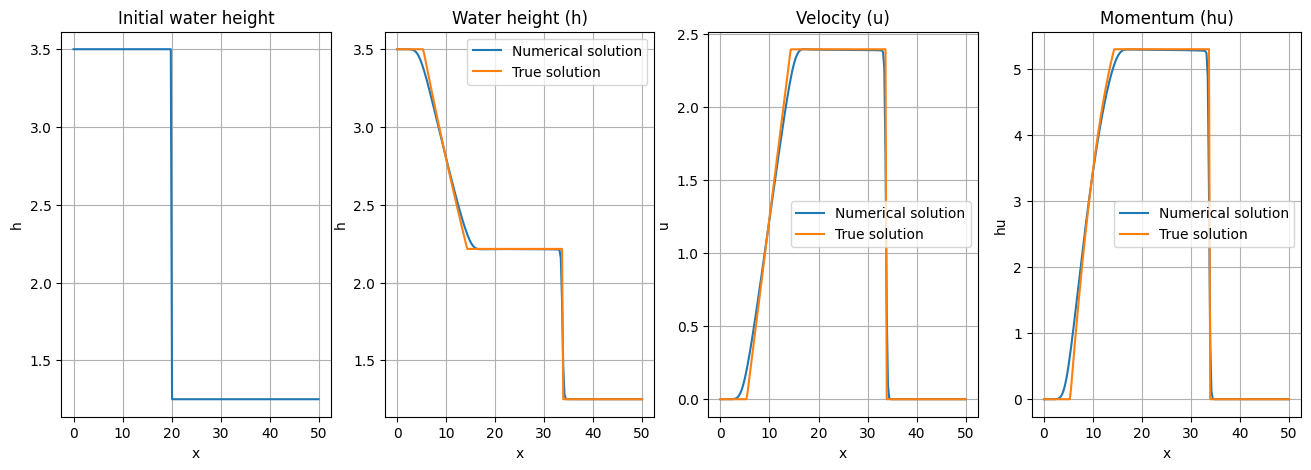

In [32]:
save = 1

# Plot the numerical solution
plt.figure(figsize=(16, 5))

plt.subplot(1, 4, 1)
plt.plot(x, h)
plt.xlabel('x')
plt.ylabel('h')
plt.grid()
plt.title('Initial water height')

plt.subplot(1, 4, 2)
plt.plot(x, h_num, label='Numerical solution')
plt.plot(x, h_sol, label='True solution')
plt.xlabel('x')
plt.ylabel('h')
plt.legend()
plt.grid()
plt.title('Water height (h)')

plt.subplot(1, 4, 3)
plt.plot(x, hu_num/h_num, label='Numerical solution')
plt.plot(x, u_sol, label='True solution')
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.grid()
plt.title('Velocity (u)')

plt.subplot(1, 4, 4)
plt.plot(x, hu_num, label='Numerical solution')
plt.plot(x, u_sol*h_sol, label='True solution')
plt.xlabel('x')
plt.ylabel('hu')
plt.legend()
plt.grid()
plt.title('Momentum (hu)')

# Save figure
if save:
    plt.savefig('plots/sol_1D_val.png')

plt.show()


# Toro test cases

In [55]:
# FLUX CHOICE
# 1--> Godunov method with exact Rieamnn problem
# 2--> Lax-Friedrichs
# 3--> Lax-Wendroff
# 4--> FORCE
# 5--> HLLC
# 6--> Flux-splitting (2020) UPWIND

save = 1

## Test 1

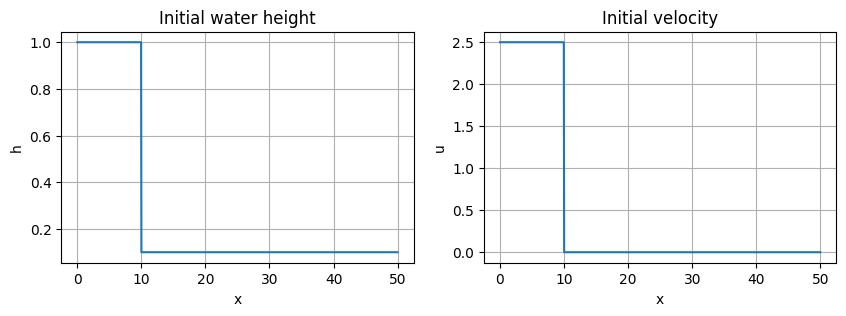

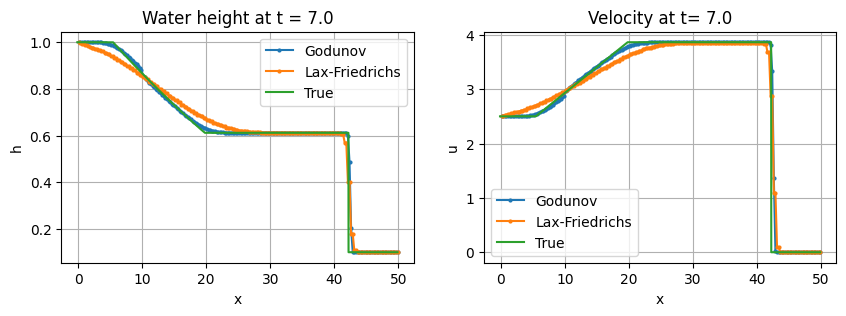

In [56]:
# Physical parameters
xL = 0
xR = 50
t = 0
tend = 7.0

# Numerical parameters
Nx = 1000 # the number of the cell-centers
dx = (xR - xL) / Nx  # distance between the mesh points
x = np.linspace(xL + dx / 2, xR - dx / 2, Nx)

# Initial conditions
h = np.zeros(Nx)
u = np.zeros(Nx)
hL = 1.0
hR = 0.1
uL = 2.5
uR = 0.0
x0 = 10.0

# Define initial water height and velocity
h = np.where(x < x0, hL, hR)           
u = np.where(x < x0, uL, uR)

# Plot the initial data
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.plot(x, h)
plt.grid()
plt.ylabel('h')
plt.xlabel('x')
plt.title('Initial water height')

plt.subplot(1, 2, 2)
plt.plot(x, u)
plt.grid()
plt.ylabel('u')
plt.xlabel('x')
plt.title('Initial velocity')

# Save figure
if save:
    plt.savefig('plots/toro_test1_initial.png')

plt.show()

# Import numerical and true solution from Matlab
mat_data = loadmat('data/torotest1flux1.mat')
xc = mat_data['xc']
h_GOD = mat_data['h']
u_GOD = mat_data['u']
xexact = mat_data['xexact']
hexact = mat_data['hexact']
uexact = mat_data['uexact']

# Load other numerical solutions
mat_data = loadmat('data/torotest1flux2.mat')
h_LF = mat_data['h']
u_LF = mat_data['u']

mat_data = loadmat('data/torotest1flux3.mat')
h_LW = mat_data['h']
u_LW = mat_data['u']

mat_data = loadmat('data/torotest1flux4.mat')
h_FORCE = mat_data['h']
u_FORCE = mat_data['u']

mat_data = loadmat('data/torotest1flux5.mat')
h_HLLC = mat_data['h']
u_HLLC = mat_data['u']

mat_data = loadmat('data/torotest1flux6.mat')
h_FS = mat_data['h']
u_FS = mat_data['u']

# Plot the final data
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.plot(xc[0,:], h_GOD[0,:], '-o', markersize = 2)
plt.plot(xc[0,:], h_LF[0,:], '-o', markersize = 2)
plt.plot(xexact[0, :], hexact[0, :])
plt.legend(['Godunov', 'Lax-Friedrichs', 'True'])
plt.grid()
plt.ylabel('h')
plt.xlabel('x')
plt.title(f'Water height at t = {tend}')

plt.subplot(1, 2, 2)
plt.plot(xc[0,:], u_GOD[0,:], '-o', markersize = 2)
plt.plot(xc[0,:], u_LF[0,:], '-o', markersize = 2)
plt.plot(xexact[0, :], uexact[0, :])
plt.legend(['Godunov', 'Lax-Friedrichs', 'True'])
plt.grid()
plt.ylabel('u')
plt.xlabel('x')
plt.title(f'Velocity at t= {tend}')

# Save figure
if save:
    plt.savefig('plots/toro_test1_final.png')

plt.show()

## Test 2

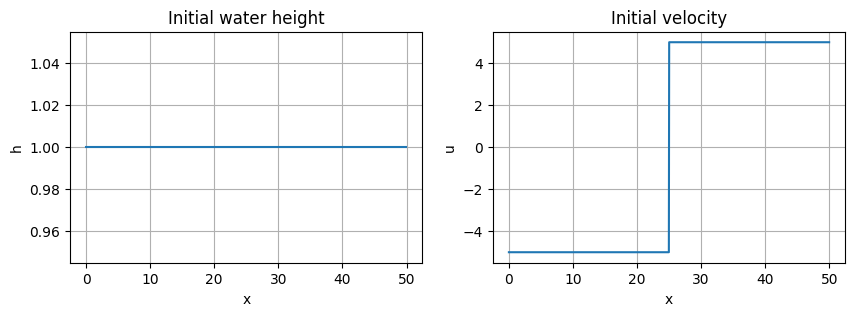

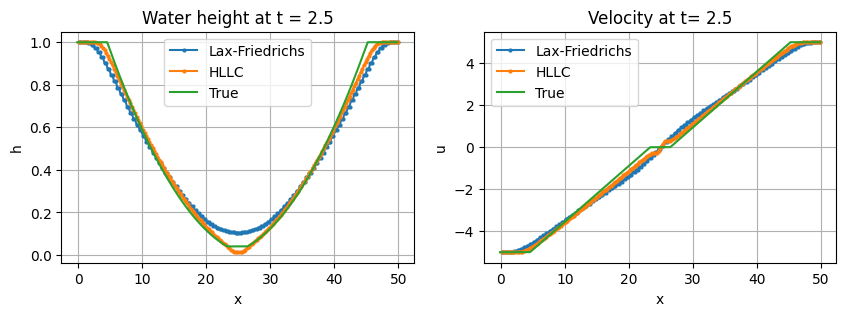

In [57]:
# Physical parameters
xL = 0
xR = 50
t = 0
tend = 2.5

# Numerical parameters
Nx = 1000 # the number of the cell-centers
dx = (xR - xL) / Nx  # distance between the mesh points
x = np.linspace(xL + dx / 2, xR - dx / 2, Nx)

# Initial conditions
h = np.zeros(Nx)
u = np.zeros(Nx)
hL = 1.0
hR = 1.0
uL = -5.0
uR = 5.0
x0 = 25.0

# Define initial water height and velocity
h = np.where(x < x0, hL, hR)           
u = np.where(x < x0, uL, uR)

# Plot the initial data
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.plot(x, h)
plt.grid()
plt.ylabel('h')
plt.xlabel('x')
plt.title('Initial water height')

plt.subplot(1, 2, 2)
plt.plot(x, u)
plt.grid()
plt.ylabel('u')
plt.xlabel('x')
plt.title('Initial velocity')

# Save figure
if save:
    plt.savefig('plots/toro_test2_initial.png')

plt.show()

# Import numerical and true solution from Matlab - Godunov method and split upwind does not work
mat_data = loadmat('data/torotest2flux2.mat')
xc = mat_data['xc']
h_LF = mat_data['h']
u_LF = mat_data['u']
xexact = mat_data['xexact']
hexact = mat_data['hexact']
uexact = mat_data['uexact']

# Load other numerical solutions
mat_data = loadmat('data/torotest2flux3.mat')
h_LW = mat_data['h']
u_LW = mat_data['u']

mat_data = loadmat('data/torotest2flux4.mat')
h_FORCE = mat_data['h']
u_FORCE = mat_data['u']

mat_data = loadmat('data/torotest2flux5.mat')
h_HLLC = mat_data['h']
u_HLLC = mat_data['u']

# Plot the final data
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.plot(xc[0,:], h_LF[0,:], '-o', markersize = 2)
plt.plot(xc[0,:], h_HLLC[0,:], '-o', markersize = 2)
plt.plot(xexact[0, :], hexact[0, :])
plt.legend(['Lax-Friedrichs','HLLC','True'])
plt.grid()
plt.ylabel('h')
plt.xlabel('x')
plt.title(f'Water height at t = {tend}')

plt.subplot(1, 2, 2)
plt.plot(xc[0,:], u_LF[0,:], '-o', markersize = 2)
plt.plot(xc[0,:], u_HLLC[0,:], '-o', markersize = 2)
plt.plot(xexact[0, :], uexact[0, :])
plt.legend(['Lax-Friedrichs','HLLC','True'])
plt.grid()
plt.ylabel('u')
plt.xlabel('x')
plt.title(f'Velocity at t= {tend}')

# Save figure
if save:
    plt.savefig('plots/toro_test2_final.png')

plt.show()

## Test 3

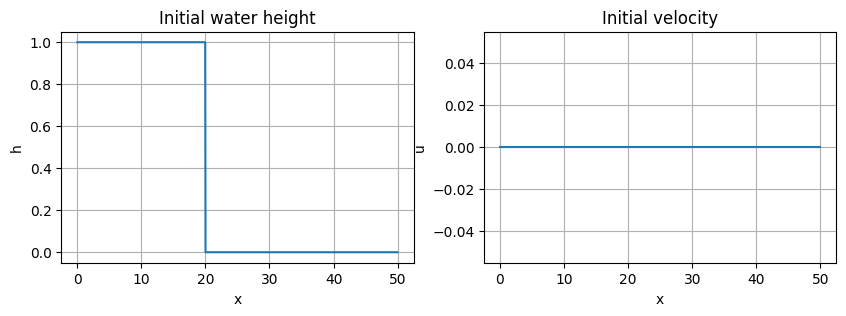

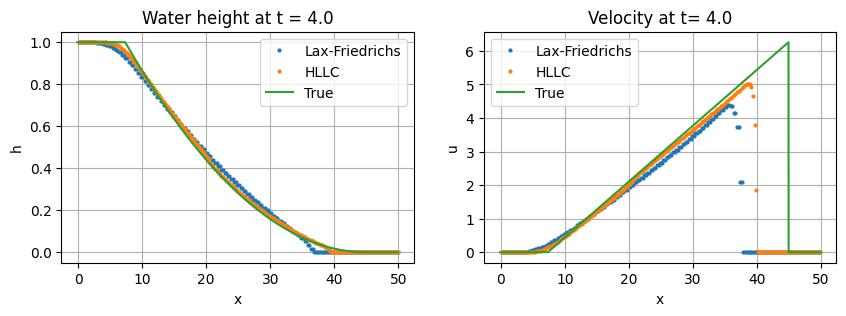

In [58]:
# Physical parameters
xL = 0
xR = 50
t = 0
tend = 4.0

# Numerical parameters
Nx = 1000  # the number of the cell-centers
dx = (xR - xL) / Nx  # distance between the mesh points
x = np.linspace(xL + dx / 2, xR - dx / 2, Nx)

# Initial conditions
h = np.zeros(Nx)
u = np.zeros(Nx)
hL = 1.0
hR = 0.0
uL = 0.0
uR = 0.0
x0 = 20.0

# Define initial water height and velocity
h = np.where(x < x0, hL, hR)           
u = np.where(x < x0, uL, uR)

# Plot the initial data
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.plot(x, h)
plt.grid()
plt.ylabel('h')
plt.xlabel('x')
plt.title('Initial water height')

plt.subplot(1, 2, 2)
plt.plot(x, u)
plt.grid()
plt.ylabel('u')
plt.xlabel('x')
plt.title('Initial velocity')

# Save figure
if save:
    plt.savefig('plots/toro_test3_initial.png')

plt.show()

# Import numerical and true solution from Matlab - Godunov method and split upwind does not work
mat_data = loadmat('data/torotest6flux1.mat')  # Load another test, which have hR = 0.0 
xexact = mat_data['xexact']
hexact = mat_data['hexact']
uexact = mat_data['uexact']

mat_data = loadmat('data/torotest3flux2.mat')
xc = mat_data['xc']
h_LF = mat_data['h']
u_LF = mat_data['u']

# Load other numerical solutions
mat_data = loadmat('data/torotest3flux3.mat')
h_LW = mat_data['h']
u_LW = mat_data['u']

mat_data = loadmat('data/torotest3flux4.mat')
h_FORCE = mat_data['h']
u_FORCE = mat_data['u']

mat_data = loadmat('data/torotest3flux5.mat')
h_HLLC = mat_data['h']
u_HLLC = mat_data['u']

# Plot the final data
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.plot(xc[0,:], h_LF[0,:], 'o', markersize = 2)
plt.plot(xc[0,:], h_HLLC[0,:], 'o', markersize = 2)
plt.plot(xexact[0, :], hexact[0, :])
plt.legend(['Lax-Friedrichs','HLLC','True'])
plt.grid()
plt.ylabel('h')
plt.xlabel('x')
plt.title(f'Water height at t = {tend}')

plt.subplot(1, 2, 2)
plt.plot(xc[0,:], u_LF[0,:], 'o', markersize = 2)
plt.plot(xc[0,:], u_HLLC[0,:], 'o', markersize = 2)
plt.plot(xexact[0, :], uexact[0, :])
plt.legend(['Lax-Friedrichs','HLLC','True'])
plt.grid()
plt.ylabel('u')
plt.xlabel('x')
plt.title(f'Velocity at t= {tend}')

# Save figure
if save:
    plt.savefig('plots/toro_test3_final.png')

plt.show()

## Test 4

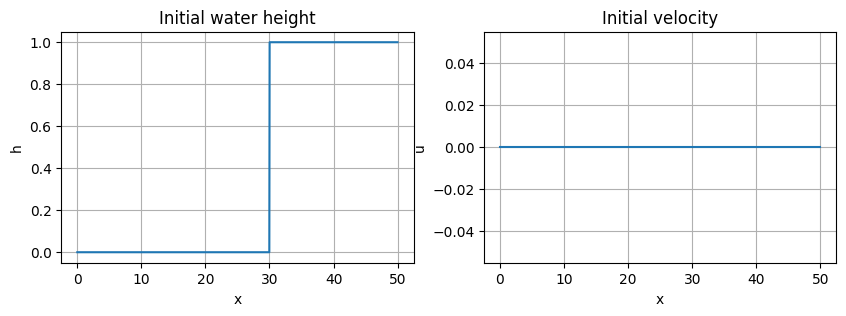

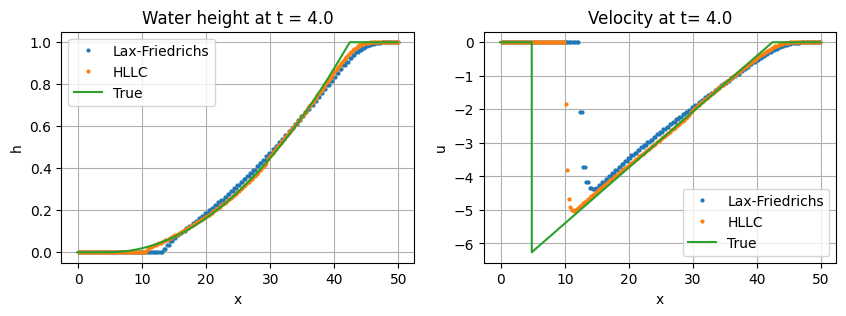

In [59]:
# Physical parameters
xL = 0
xR = 50
t = 0
tend = 4.0

# Numerical parameters
Nx = 1000  # the number of the cell-centers
dx = (xR - xL) / Nx  # distance between the mesh points
x = np.linspace(xL + dx / 2, xR - dx / 2, Nx)

# Initial conditions
h = np.zeros(Nx)
u = np.zeros(Nx)
hL = 0.0
hR = 1.0
uL = 0.0
uR = 0.0
x0 = 30.0

# Define initial water height and velocity
h = np.where(x < x0, hL, hR)           
u = np.where(x < x0, uL, uR)

# Plot the initial data
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.plot(x, h)
plt.grid()
plt.ylabel('h')
plt.xlabel('x')
plt.title('Initial water height')

plt.subplot(1, 2, 2)
plt.plot(x, u)
plt.grid()
plt.ylabel('u')
plt.xlabel('x')
plt.title('Initial velocity')

# Save figure
if save:
    plt.savefig('plots/toro_test4_initial.png')

plt.show()

# Import numerical and true solution from Matlab - Godunov method and split upwind does not work
mat_data = loadmat('data/torotest7flux1.mat')  # Load another test, which have hR = 0.0 
xexact = mat_data['xexact']
hexact = mat_data['hexact']
uexact = mat_data['uexact']

# Load other numerical solutions
mat_data = loadmat('data/torotest4flux2.mat')
xc = mat_data['xc']
h_LF = mat_data['h']
u_LF = mat_data['u']

mat_data = loadmat('data/torotest4flux3.mat')
h_LW = mat_data['h']
u_LW = mat_data['u']

mat_data = loadmat('data/torotest4flux4.mat')
h_FORCE = mat_data['h']
u_FORCE = mat_data['u']

mat_data = loadmat('data/torotest4flux5.mat')
h_HLLC = mat_data['h']
u_HLLC = mat_data['u']

# Plot the final data
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.plot(xc[0,:], h_LF[0,:], 'o', markersize = 2)
plt.plot(xc[0,:], h_HLLC[0,:], 'o', markersize = 2)
plt.plot(xexact[0, :], hexact[0, :])
plt.legend(['Lax-Friedrichs','HLLC','True'])
plt.grid()
plt.ylabel('h')
plt.xlabel('x')
plt.title(f'Water height at t = {tend}')

plt.subplot(1, 2, 2)
plt.plot(xc[0,:], u_LF[0,:], 'o', markersize = 2)
plt.plot(xc[0,:], u_HLLC[0,:], 'o', markersize = 2)
plt.plot(xexact[0, :], uexact[0, :])
plt.legend(['Lax-Friedrichs','HLLC','True'])
plt.grid()
plt.ylabel('u')
plt.xlabel('x')
plt.title(f'Velocity at t= {tend}')

# Save figure
if save:
    plt.savefig('plots/toro_test4_final.png')

plt.show()

## Test 5

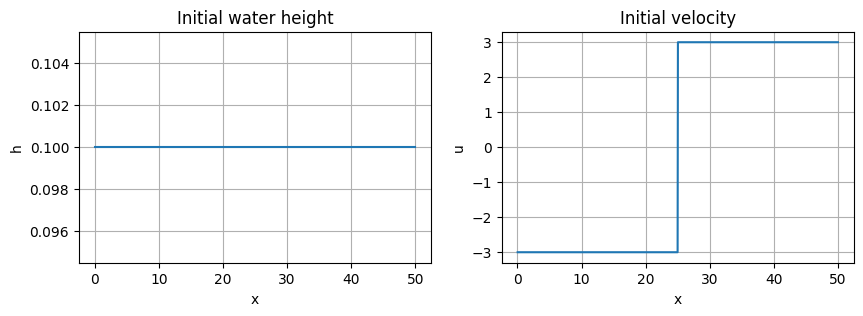

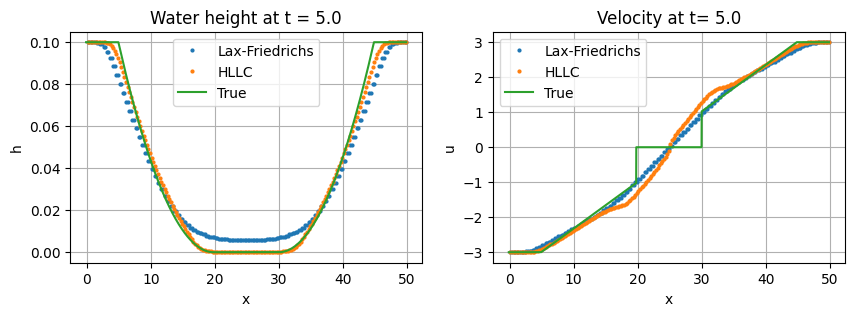

In [60]:
# Physical parameters
xL = 0
xR = 50
t = 0
tend = 5.0

# Numerical parameters
Nx = 1000 # the number of the cell-centers
dx = (xR - xL) / Nx  # distance between the mesh points
x = np.linspace(xL + dx / 2, xR - dx / 2, Nx)

# Initial conditions
h = np.zeros(Nx)
u = np.zeros(Nx)
hL = 0.1
hR = 0.1
uL = -3.0
uR = 3.0
x0 = 25.0

# Define initial water height and velocity
h = np.where(x < x0, hL, hR)           
u = np.where(x < x0, uL, uR)

# Plot the initial data
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.plot(x, h)
plt.grid()
plt.ylabel('h')
plt.xlabel('x')
plt.title('Initial water height')

plt.subplot(1, 2, 2)
plt.plot(x, u)
plt.grid()
plt.ylabel('u')
plt.xlabel('x')
plt.title('Initial velocity')

# Save figure
if save:
    plt.savefig('plots/toro_test5_initial.png')

plt.show()

# Import numerical and true solution from Matlab - Godunov method and split upwind does not work
mat_data = loadmat('data/torotest5flux2.mat')
xc = mat_data['xc']
h_LF = mat_data['h']
u_LF = mat_data['u']
xexact = mat_data['xexact']
hexact = mat_data['hexact']
uexact = mat_data['uexact']

# Load other numerical solutions
mat_data = loadmat('data/torotest5flux3.mat')
h_LW = mat_data['h']
u_LW = mat_data['u']

mat_data = loadmat('data/torotest5flux4.mat')
h_FORCE = mat_data['h']
u_FORCE = mat_data['u']

mat_data = loadmat('data/torotest5flux5.mat')
h_HLLC = mat_data['h']
u_HLLC = mat_data['u']

# Plot the final data
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.plot(xc[0,:], h_LF[0,:], 'o', markersize = 2)
plt.plot(xc[0,:], h_HLLC[0,:], 'o', markersize = 2)
plt.plot(xexact[0, :], hexact[0, :])
plt.legend(['Lax-Friedrichs','HLLC','True'])
plt.grid()
plt.ylabel('h')
plt.xlabel('x')
plt.title(f'Water height at t = {tend}')

plt.subplot(1, 2, 2)
plt.plot(xc[0,:], u_LF[0,:], 'o', markersize = 2)
plt.plot(xc[0,:], u_HLLC[0,:], 'o', markersize = 2)
plt.plot(xexact[0, :], uexact[0, :])
plt.legend(['Lax-Friedrichs','HLLC','True'])
plt.grid()
plt.ylabel('u')
plt.xlabel('x')
plt.title(f'Velocity at t= {tend}')

# Save figure
if save:
    plt.savefig('plots/toro_test5_final.png')

plt.show()